In [79]:
%matplotlib inline
import numpy as np
import pandas as pd
import nltk


!pip install scikit-plot


import re
import string

import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import gensim
from gensim.models.doc2vec import Doc2Vec,TaggedDocument

from nltk.corpus import stopwords

### Data Set-Up

In [38]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
Y_train = pd.read_csv('Y_train.csv')
Y_test = pd.read_csv('Y_test.csv')
X_train.shape

(3599999, 3)

### TF-IDF vectorization

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectoriser = TfidfVectorizer()


In [6]:
X_train = X_train.fillna(X_train.mode().iloc[0])
X_train.isnull().sum()

Unnamed: 0    0
title         0
text          0
dtype: int64

In [7]:
X_test = X_test.fillna(X_test.mode().iloc[0])
X_test.isnull().sum()

Unnamed: 0    0
title         0
text          0
dtype: int64

In [8]:
tfidf_vectoriser.fit(X_train['text'])
X_train_tf = tfidf_vectoriser.transform(X_train['text'])
X_test_tf = tfidf_vectoriser.transform(X_test['text'])
X_train_tf.shape, X_test_tf.shape                        

((3599999, 2198346), (399999, 2198346))

In [39]:
Y_train = Y_train.drop("Unnamed: 0", axis=1)


In [40]:
Y_test = Y_test.drop("Unnamed: 0", axis=1)


In [10]:
print(f'No. of Features:{X_train_tf.shape[1]}')

No. of Features:2198346


### Naive Bayes

In [11]:
#MultinomialNB
# Build the classifier
multinomial_nb_model = MultinomialNB()

#  Train the classifier
multinomial_nb_model.fit(X_train_tf, np.ravel(Y_train))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
#BernoulliNB
# Build the classifier
bernoulli_nb_model = BernoulliNB()

#  Train the classifier
bernoulli_nb_model.fit(X_train_tf, Y_train)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

### Logistic Regression

In [13]:
pipe = Pipeline([('standardscaler', StandardScaler(with_mean=False)),
                 ('logisticregression', LogisticRegression(random_state=42,solver='lbfgs', max_iter=1000))])
pipe.fit(X_train_tf, Y_train)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

### Linear SVC

In [14]:
linear_svc_model = LinearSVC()
linear_svc_model.fit(X_train_tf, Y_train)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

### Decision Trees

In [15]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(max_depth=10,min_samples_split=4,min_samples_leaf=300)
model_dt.fit(X_train_tf, Y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=300, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=4,min_samples_leaf=300)
model_rf.fit(X_train_tf, Y_train) 


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=300, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Performance Evaluation

### Train data

In [32]:
def report(model,X,Y,modelName,train=True):
    YPred = model.predict(X)
    if train:
        print(f"{modelName} Training Data Result:\n================================================")
    else:
        print(f"{modelName} Test Data Result:\n================================================")
    print(f"Accuracy Score: {accuracy_score(Y, YPred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(Y, YPred)}\n")
    print("_______________________________________________")
    clf_report = pd.DataFrame(classification_report(Y, YPred, output_dict=True))
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    skplt.metrics.plot_confusion_matrix(Y, YPred)

Multinomial NB Model Training Data Result:
Accuracy Score: 84.71%
_______________________________________________
Confusion Matrix: 
 [[1549901  250099]
 [ 300297 1499702]]

_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  8.376947e-01  8.570700e-01  0.847112  8.473824e-01  8.473823e-01
recall     8.610561e-01  8.331682e-01  0.847112  8.471122e-01  8.471122e-01
f1-score   8.492148e-01  8.449501e-01  0.847112  8.470824e-01  8.470824e-01
support    1.800000e+06  1.799999e+06  0.847112  3.599999e+06  3.599999e+06


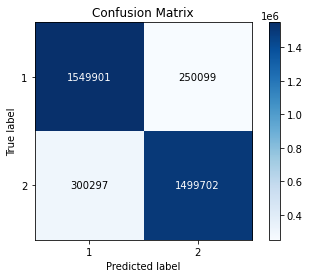

In [18]:
report(multinomial_nb_model,X_train_tf,Y_train,'Multinomial NB Model')

Bernoulli NB Model Training Data Result:
Accuracy Score: 85.25%
_______________________________________________
Confusion Matrix: 
 [[1516008  283992]
 [ 246992 1553007]]

_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  8.599024e-01  8.454044e-01  0.852504  8.526534e-01  8.526534e-01
recall     8.422267e-01  8.627821e-01  0.852504  8.525044e-01  8.525044e-01
f1-score   8.509728e-01  8.540049e-01  0.852504  8.524888e-01  8.524888e-01
support    1.800000e+06  1.799999e+06  0.852504  3.599999e+06  3.599999e+06


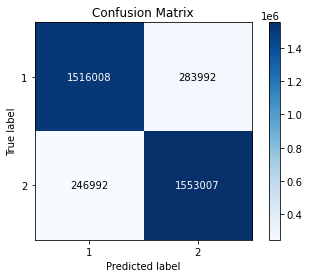

In [19]:
report(bernoulli_nb_model,X_train_tf,Y_train,'Bernoulli NB Model')

Logistic regression Model Training Data Result:
Accuracy Score: 94.10%
_______________________________________________
Confusion Matrix: 
 [[1691519  108481]
 [ 103822 1696177]]

_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  9.421714e-01  9.398883e-01  0.941027  9.410299e-01  9.410299e-01
recall     9.397328e-01  9.423211e-01  0.941027  9.410269e-01  9.410269e-01
f1-score   9.409505e-01  9.411031e-01  0.941027  9.410268e-01  9.410268e-01
support    1.800000e+06  1.799999e+06  0.941027  3.599999e+06  3.599999e+06


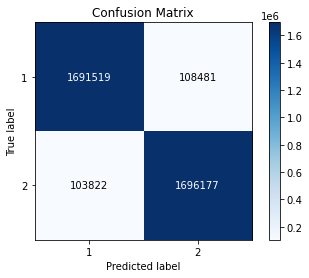

In [20]:
report(pipe,X_train_tf,Y_train,'Logistic regression Model')

Linear SVC Model Training Data Result:
Accuracy Score: 91.71%
_______________________________________________
Confusion Matrix: 
 [[1646972  153028]
 [ 145539 1654460]]

_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  9.188072e-01  9.153366e-01  0.917065  9.170719e-01  9.170719e-01
recall     9.149844e-01  9.191450e-01  0.917065  9.170647e-01  9.170647e-01
f1-score   9.168918e-01  9.172368e-01  0.917065  9.170643e-01  9.170643e-01
support    1.800000e+06  1.799999e+06  0.917065  3.599999e+06  3.599999e+06


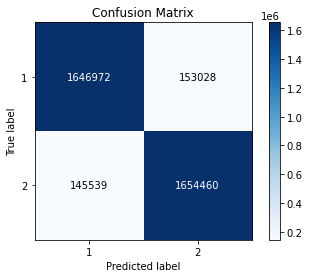

In [21]:
report(linear_svc_model,X_train_tf,Y_train,'Linear SVC Model')

Decision trees Model Training Data Result:
Accuracy Score: 68.75%
_______________________________________________
Confusion Matrix: 
 [[1510783  289217]
 [ 835867  964132]]

_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  6.438041e-01  7.692446e-01  0.687477  7.065244e-01  7.065244e-01
recall     8.393239e-01  5.356292e-01  0.687477  6.874765e-01  6.874766e-01
f1-score   7.286764e-01  6.315245e-01  0.687477  6.801004e-01  6.801005e-01
support    1.800000e+06  1.799999e+06  0.687477  3.599999e+06  3.599999e+06


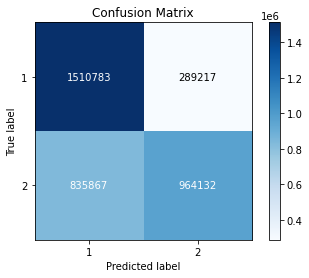

In [22]:
report(model_dt,X_train_tf,Y_train,'Decision trees Model')

Random forest Model Training Data Result:
Accuracy Score: 72.99%
_______________________________________________
Confusion Matrix: 
 [[1176026  623974]
 [ 348258 1451741]]

_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  7.715268e-01  6.993932e-01  0.729935  7.354600e-01  7.354600e-01
recall     6.533478e-01  8.065232e-01  0.729935  7.299355e-01  7.299355e-01
f1-score   7.075364e-01  7.491476e-01  0.729935  7.283420e-01  7.283420e-01
support    1.800000e+06  1.799999e+06  0.729935  3.599999e+06  3.599999e+06


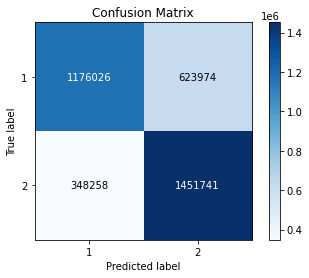

In [23]:
report(model_rf,X_train_tf,Y_train,'Random forest Model')

### Test Data 

Multinomial NB Model Test Data Result:
Accuracy Score: 82.27%
_______________________________________________
Confusion Matrix: 
 [[167741  32259]
 [ 38649 161350]]

_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy      macro avg  \
precision       0.812738       0.833381   0.82273       0.823059   
recall          0.838705       0.806754   0.82273       0.822730   
f1-score        0.825517       0.819851   0.82273       0.822684   
support    200000.000000  199999.000000   0.82273  399999.000000   

            weighted avg  
precision       0.823059  
recall          0.822730  
f1-score        0.822684  
support    399999.000000  


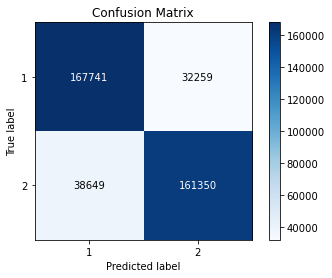

In [41]:
report(multinomial_nb_model,X_test_tf,Y_test,'Multinomial NB Model',False)

Bernoulli NB Model Test Data Result:
Accuracy Score: 82.97%
_______________________________________________
Confusion Matrix: 
 [[163749  36251]
 [ 31870 168129]]

_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy      macro avg  \
precision       0.837081       0.822629  0.829697       0.829855   
recall          0.818745       0.840649  0.829697       0.829697   
f1-score        0.827812       0.831542  0.829697       0.829677   
support    200000.000000  199999.000000  0.829697  399999.000000   

            weighted avg  
precision       0.829855  
recall          0.829697  
f1-score        0.829677  
support    399999.000000  


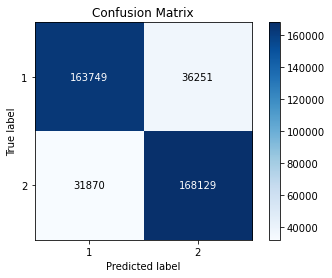

In [42]:
report(bernoulli_nb_model,X_test_tf,Y_test,'Bernoulli NB Model',False)

Logistic NB Model Test Data Result:
Accuracy Score: 80.16%
_______________________________________________
Confusion Matrix: 
 [[160219  39781]
 [ 39594 160405]]

_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy      macro avg  \
precision       0.801845       0.801280  0.801562       0.801562   
recall          0.801095       0.802029  0.801562       0.801562   
f1-score        0.801470       0.801654  0.801562       0.801562   
support    200000.000000  199999.000000  0.801562  399999.000000   

            weighted avg  
precision       0.801562  
recall          0.801562  
f1-score        0.801562  
support    399999.000000  


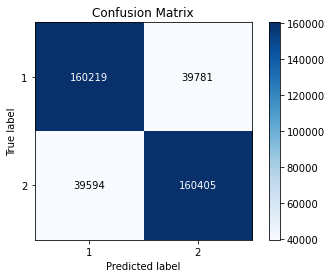

In [43]:
report(pipe,X_test_tf,Y_test,'Logistic NB Model',False)

Linear SVC Model Test Data Result:
Accuracy Score: 87.12%
_______________________________________________
Confusion Matrix: 
 [[173485  26515]
 [ 25024 174975]]

_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy      macro avg  \
precision       0.873940       0.868405  0.871152       0.871173   
recall          0.867425       0.874879  0.871152       0.871152   
f1-score        0.870670       0.871630  0.871152       0.871150   
support    200000.000000  199999.000000  0.871152  399999.000000   

            weighted avg  
precision       0.871173  
recall          0.871152  
f1-score        0.871150  
support    399999.000000  


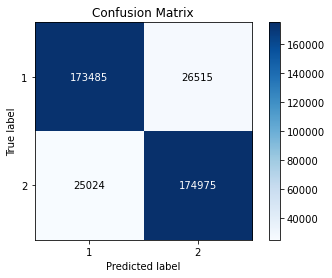

In [44]:
report(linear_svc_model,X_test_tf,Y_test,'Linear SVC Model',False)

Decision trees Model Training Data Result:
Accuracy Score: 68.82%
_______________________________________________
Confusion Matrix: 
 [[167846  32154]
 [ 92579 107420]]

_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy      macro avg  \
precision       0.644508       0.769628  0.688167       0.707068   
recall          0.839230       0.537103  0.688167       0.688166   
f1-score        0.729092       0.632677  0.688167       0.680884   
support    200000.000000  199999.000000  0.688167  399999.000000   

            weighted avg  
precision       0.707068  
recall          0.688167  
f1-score        0.680884  
support    399999.000000  


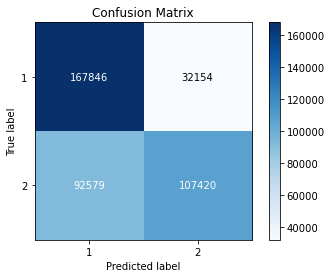

In [45]:
report(model_dt,X_test_tf,Y_test,'Decision trees Model')

Random Forest Model Training Data Result:
Accuracy Score: 72.88%
_______________________________________________
Confusion Matrix: 
 [[130571  69429]
 [ 39068 160931]]

_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy      macro avg  \
precision       0.769699       0.698607  0.728757       0.734153   
recall          0.652855       0.804659  0.728757       0.728757   
f1-score        0.706478       0.747892  0.728757       0.727185   
support    200000.000000  199999.000000  0.728757  399999.000000   

            weighted avg  
precision       0.734153  
recall          0.728757  
f1-score        0.727185  
support    399999.000000  


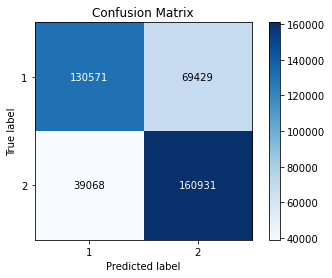

In [46]:
report(model_rf,X_test_tf,Y_test,'Random Forest Model')

### Doc2Vec


In [74]:
def feature_extract(dataset):
    data = dataset['title'] + ' ' + dataset['text']
    data = [nltk.word_tokenize(str(l)) for l in data]
    tag_doc = [TaggedDocument(doc, [i]) for i, doc in enumerate(data)]
    model = Doc2Vec(tag_doc)
    return np.array([model.docvecs[i] for i in range(len(model.docvecs))])

train_array = feature_extract(X_train)

In [75]:
print(f'No. of Features {train_array.shape[1]}')

No. of Features 100


### Naive Bayes

In [76]:
#BernoulliNB
# Build the classifier
bernoulli_nb_model = BernoulliNB()

#  Train the classifier
bernoulli_nb_model.fit(train_array, Y_train)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

### Logistic Regression

In [77]:
log_regg = LogisticRegression(random_state=42,solver='lbfgs', max_iter=1000)
log_regg.fit(train_array, Y_train)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Linear SVC

In [81]:
linear_svc_model = LinearSVC()
linear_svc_model.fit(train_array, Y_train)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

### Decision Trees

In [82]:
deci_tree = DecisionTreeClassifier(random_state=23,max_depth=15).fit(train_array,Y_train)

### Random Forest

In [83]:
rand_forest = RandomForestClassifier(random_state=25,max_depth=10,n_jobs=-1).fit(train_array,Y_train)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


### Performance Evaluation

### Train Data

Bernoulli NB Model Training Data Result:
Accuracy Score: 70.64%
_______________________________________________
Confusion Matrix: 
 [[1258685  541315]
 [ 515800 1284199]]

_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  7.093241e-01  7.034726e-01  0.706357  7.063983e-01  7.063983e-01
recall     6.992694e-01  7.134443e-01  0.706357  7.063569e-01  7.063569e-01
f1-score   7.042609e-01  7.084233e-01  0.706357  7.063421e-01  7.063421e-01
support    1.800000e+06  1.799999e+06  0.706357  3.599999e+06  3.599999e+06


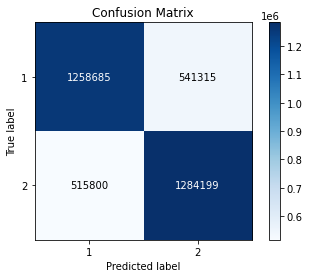

In [84]:
report(bernoulli_nb_model,train_array,Y_train,'Bernoulli NB Model')

Logistic Regression Model Training Data Result:
Accuracy Score: 78.06%
_______________________________________________
Confusion Matrix: 
 [[1403522  396478]
 [ 393534 1406465]]

_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  7.810118e-01  7.800940e-01  0.780552  7.805529e-01  7.805529e-01
recall     7.797344e-01  7.813699e-01  0.780552  7.805522e-01  7.805522e-01
f1-score   7.803726e-01  7.807314e-01  0.780552  7.805520e-01  7.805520e-01
support    1.800000e+06  1.799999e+06  0.780552  3.599999e+06  3.599999e+06


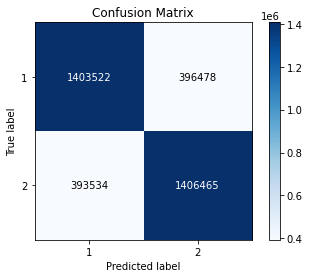

In [85]:
report(log_regg,train_array,Y_train,'Logistic Regression Model')

Linear SVC Model Test Data Result:
Accuracy Score: 78.06%
_______________________________________________
Confusion Matrix: 
 [[1401060  398940]
 [ 391058 1408941]]

_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  7.817900e-01  7.793328e-01  0.780556  7.805614e-01  7.805614e-01
recall     7.783667e-01  7.827454e-01  0.780556  7.805561e-01  7.805561e-01
f1-score   7.800746e-01  7.810354e-01  0.780556  7.805550e-01  7.805550e-01
support    1.800000e+06  1.799999e+06  0.780556  3.599999e+06  3.599999e+06


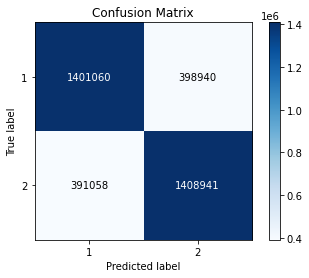

In [87]:
report(linear_svc_model,train_array,Y_train,'Linear SVC Model',False)

Decision Tree Training Data Result:
Accuracy Score: 74.07%
_______________________________________________
Confusion Matrix: 
 [[1332822  467178]
 [ 466139 1333860]]

_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  7.408843e-01  7.406063e-01  0.740745  7.407453e-01  7.407453e-01
recall     7.404567e-01  7.410337e-01  0.740745  7.407452e-01  7.407452e-01
f1-score   7.406704e-01  7.408199e-01  0.740745  7.407452e-01  7.407452e-01
support    1.800000e+06  1.799999e+06  0.740745  3.599999e+06  3.599999e+06


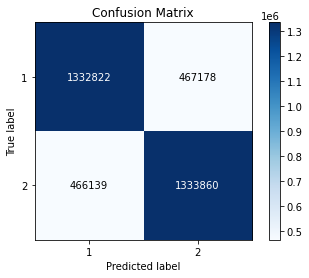

In [88]:
report(deci_tree,train_array,Y_train,'Decision Tree')

Random Forest Training Data Result:
Accuracy Score: 72.93%
_______________________________________________
Confusion Matrix: 
 [[1315048  484952]
 [ 489654 1310345]]

_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  7.286788e-01  7.298764e-01  0.729276  7.292776e-01  7.292776e-01
recall     7.305822e-01  7.279698e-01  0.729276  7.292760e-01  7.292760e-01
f1-score   7.296292e-01  7.289219e-01  0.729276  7.292756e-01  7.292756e-01
support    1.800000e+06  1.799999e+06  0.729276  3.599999e+06  3.599999e+06


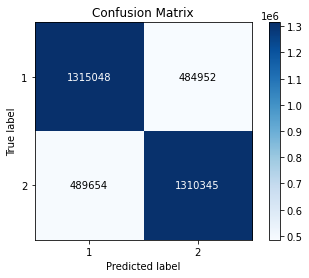

In [89]:
report(rand_forest,train_array,Y_train,'Random Forest')

### Test Data

In [90]:

test_array = feature_extract(X_test)

Bernoulli NB Model Test Data Result:
Accuracy Score: 67.62%
_______________________________________________
Confusion Matrix: 
 [[162201  37799]
 [ 91724 108275]]

_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy      macro avg  \
precision       0.638775       0.741234  0.676192       0.690005   
recall          0.811005       0.541378  0.676192       0.676191   
f1-score        0.714660       0.625735  0.676192       0.670197   
support    200000.000000  199999.000000  0.676192  399999.000000   

            weighted avg  
precision       0.690004  
recall          0.676192  
f1-score        0.670198  
support    399999.000000  


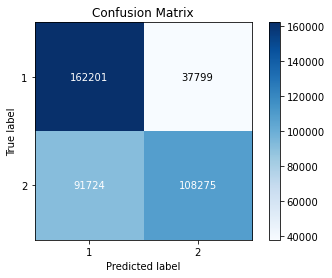

In [91]:
report(bernoulli_nb_model,test_array,Y_test,'Bernoulli NB Model',False)

Logistic Regression Model Test Data Result:
Accuracy Score: 70.81%
_______________________________________________
Confusion Matrix: 
 [[166126  33874]
 [ 82877 117122]]

_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy      macro avg  \
precision       0.667165       0.775663  0.708122       0.721414   
recall          0.830630       0.585613  0.708122       0.708121   
f1-score        0.739977       0.667371  0.708122       0.703674   
support    200000.000000  199999.000000  0.708122  399999.000000   

            weighted avg  
precision       0.721414  
recall          0.708122  
f1-score        0.703674  
support    399999.000000  


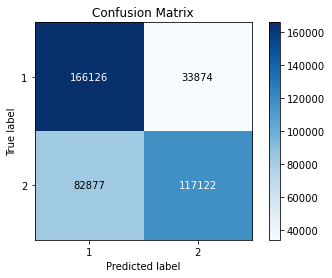

In [92]:
report(log_regg,test_array,Y_test,'Logistic Regression Model',False)

Linear SVC Model Test Data Result:
Accuracy Score: 70.84%
_______________________________________________
Confusion Matrix: 
 [[165867  34133]
 [ 82502 117497]]

_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy      macro avg  \
precision       0.667825       0.774893  0.708412       0.721359   
recall          0.829335       0.587488  0.708412       0.708411   
f1-score        0.739868       0.668301  0.708412       0.704085   
support    200000.000000  199999.000000  0.708412  399999.000000   

            weighted avg  
precision       0.721359  
recall          0.708412  
f1-score        0.704085  
support    399999.000000  


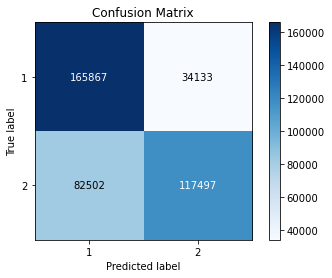

In [93]:
report(linear_svc_model,test_array,Y_test,'Linear SVC Model',False)

Decision Tree Test Data Result:
Accuracy Score: 62.12%
_______________________________________________
Confusion Matrix: 
 [[134345  65655]
 [ 85870 114129]]

_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy      macro avg  \
precision       0.610063       0.634812  0.621187       0.622437   
recall          0.671725       0.570648  0.621187       0.621186   
f1-score        0.639411       0.601022  0.621187       0.620216   
support    200000.000000  199999.000000  0.621187  399999.000000   

            weighted avg  
precision       0.622437  
recall          0.621187  
f1-score        0.620217  
support    399999.000000  


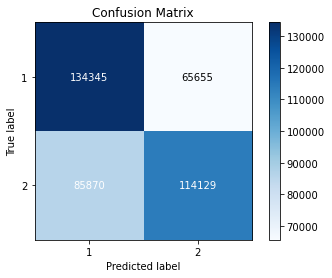

In [94]:
report(deci_tree,test_array,Y_test,'Decision Tree',False)

Random Forest Test Data Result:
Accuracy Score: 66.47%
_______________________________________________
Confusion Matrix: 
 [[145334  54666]
 [ 79469 120530]]

_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy      macro avg  \
precision       0.646495       0.687972  0.664662       0.667234   
recall          0.726670       0.602653  0.664662       0.664662   
f1-score        0.684242       0.642493  0.664662       0.663367   
support    200000.000000  199999.000000  0.664662  399999.000000   

            weighted avg  
precision       0.667234  
recall          0.664662  
f1-score        0.663367  
support    399999.000000  


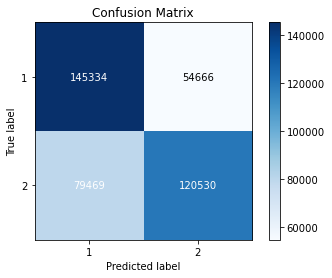

In [95]:
report(rand_forest,test_array,Y_test,'Random Forest',False)